In [313]:
import networkx as nx
import pandas as pd
import numpy as np
import ctypes
import matplotlib.colors as clr
import matplotlib.pyplot as plt

In [314]:
base_dir = "../data/"
df_rank = pd.read_csv(base_dir+"steam_05.realrank", sep=' ', header=None, index_col=0, names=['rank']).sort_index()

In [315]:
df_train = pd.read_csv(base_dir+"steam.train", sep=' ', header=None, index_col=0, names=['expected']).sort_index()

In [316]:
df_train = df_train.join(df_rank)

In [467]:
from sklearn.metrics import f1_score, balanced_accuracy_score, recall_score, precision_score
def calc_metrics_t_sybils(t):
    prev = df_train['expected'].values
    pred_t = np.where(df_train['rank'].values > t, 1, 0)
    
    #invertendo classes
    
    prev = np.logical_not(prev).astype(int)
    pred_t = np.logical_not(pred_t).astype(int)
    
    compare = zip(pred_t, prev)
    
    recall = recall_score(prev, pred_t)
    precision = precision_score(prev, pred_t)
    f1 = f1_score(prev, pred_t)
    ba = balanced_accuracy_score(prev, pred_t)
    
    return np.array([recall, precision, f1, ba])
    


In [484]:
import matplotlib.pyplot as plt
def plt_metrics(metrics):
    xs = metrics.index
    ys = metrics.columns
    plt.figure(figsize=(15,9))
    for y in ys:
        plt.plot(xs,metrics[y], label=y)
        plt.legend()
    plt.show()

In [497]:
metrics = pd.DataFrame(columns=['recall', 'precision', 'f-measure', 'balanced accuracy'])
for t in range(0, 800, 1):
    i = t*0.0001
    metrics.loc[i, :] = calc_metrics_t_sybils(i)

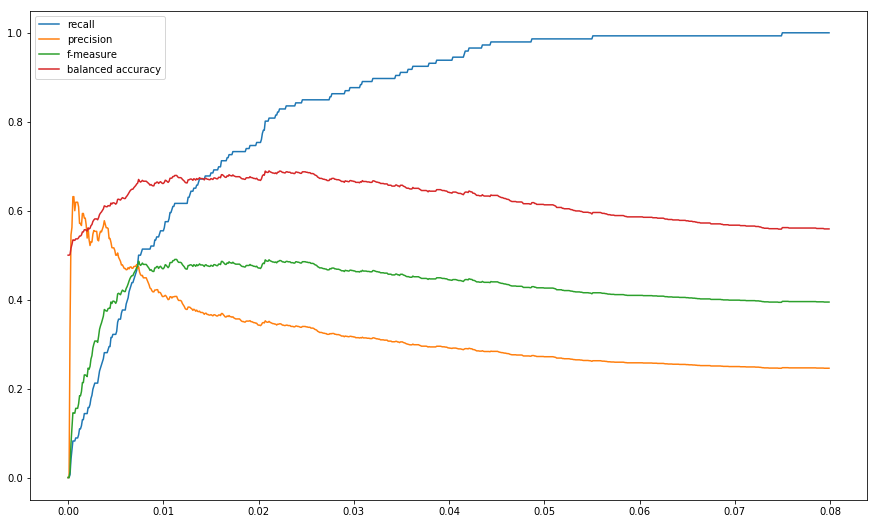

In [498]:
plt_metrics(metrics)